# A Step-by-Step Guide to Calculating Autocorrelation and Partial Autocorrelation

## Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
%config InlineBackend.figure_format = "retina"

## Data

In [3]:
df = pd.read_csv("../data/air_passengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
y = df["#Passengers"]
y

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

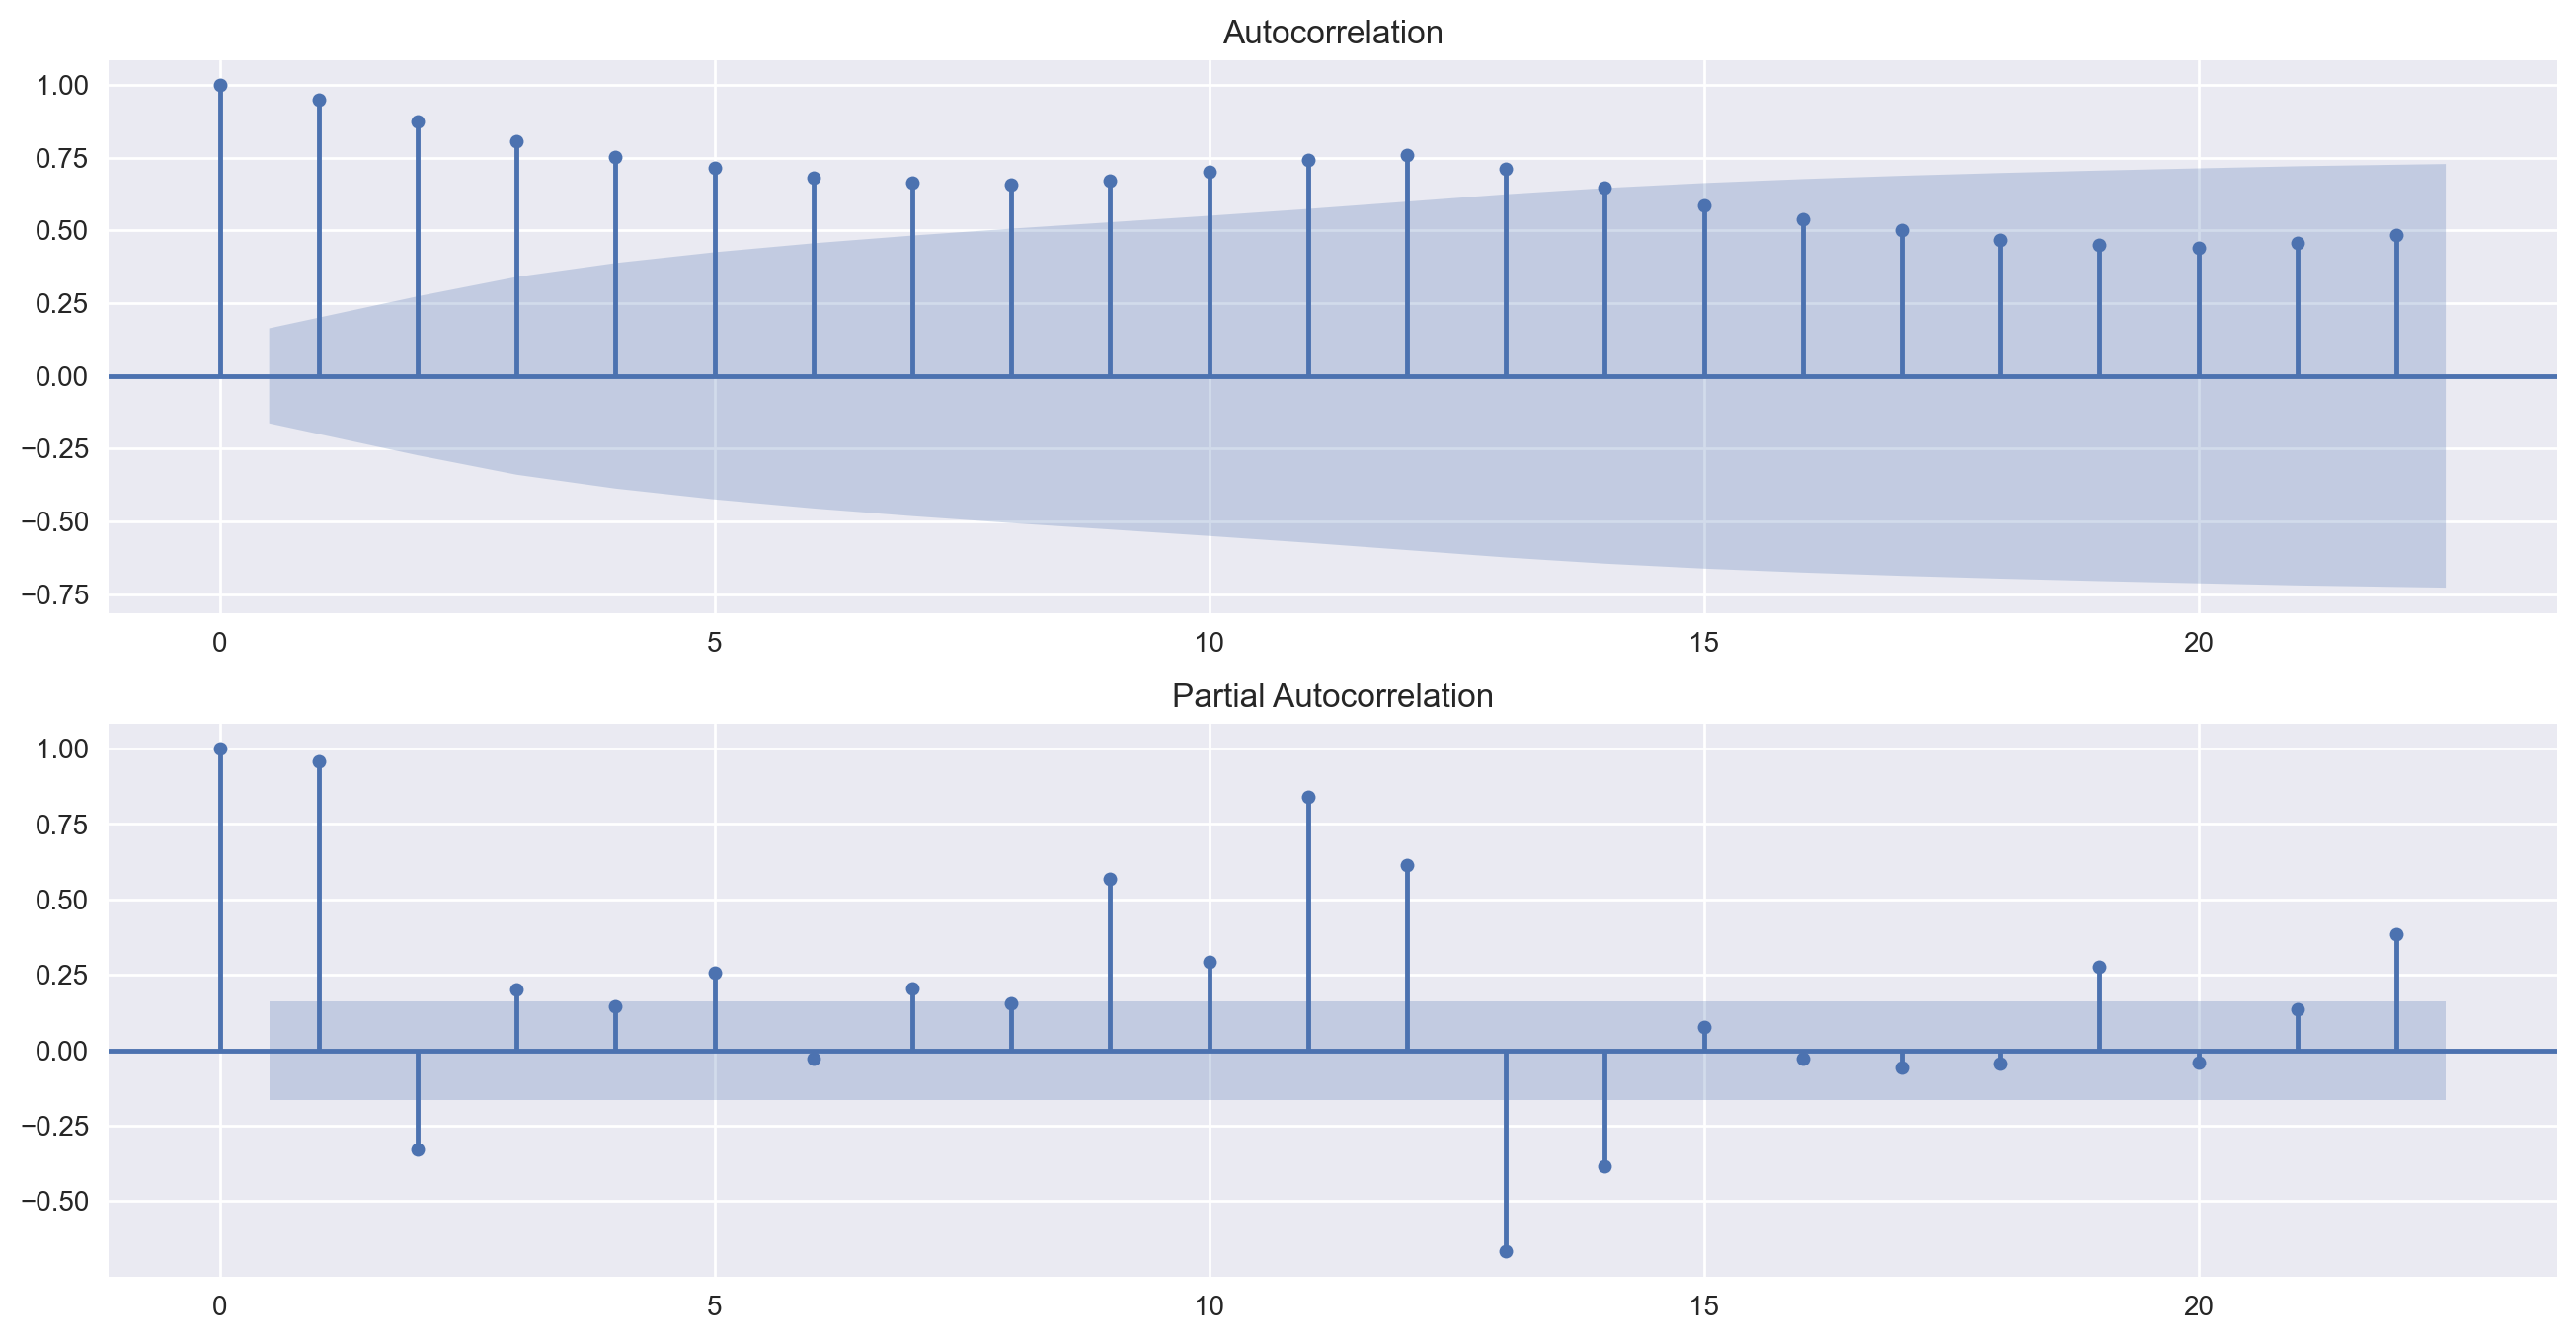

In [4]:
fig, ax = plt.subplots(2, 1)

plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1], method="ols")

## Autocorrelation Function (ACF)

In [5]:
acf(y, nlags=10)

/Users/elewinson/Documents/eryk_private/erykml/medium_articles/medium/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

### Replicating it the wrong way

In [6]:
acf_df = pd.DataFrame()
for lag in range(0, 11):
    acf_df[f"y_lag_{lag}"] = y.shift(lag)

acf_df

,y_lag_0,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,y_lag_9,y_lag_10
Month,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-05-01,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0


In [7]:
acf_df.corr()["y_lag_0"].values

array([1.        , 0.96019465, 0.89567531, 0.83739477, 0.7977347 ,
       0.78594315, 0.7839188 , 0.78459213, 0.79221505, 0.8278519 ,
       0.8827128 ])

### Replicating it the right way

In [8]:
# benchmark
acf(y, nlags=10)

/Users/elewinson/Documents/eryk_private/erykml/medium_articles/medium/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [9]:
# replicating the acf function
acf_list = []
mu = y.mean() 

for lag in range(0, 11):
    acf_list.append(np.dot((y - mu).iloc[lag:], (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu) ** 2))

np.array(acf_list)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [10]:
# alternative way to write the same using sum instead of the dot product
acf_list = []
mu = y.mean() 

for lag in range(0, 11):
    acf_list.append(sum((y - mu).iloc[lag:] * (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu) ** 2))

np.array(acf_list)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

## Partial Autocorrelation Function (PACF)

In [11]:
pacf(df, nlags=10, method="ols")

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])

In [12]:
N_LAGS = 10

# the first partial autocorrelation is always equal to 1
pacf_list = [1]

X = pd.DataFrame(lagmat(y, N_LAGS))
X.columns = [f"lag_{lag+1}" for lag in range(10)]

for k in range(1, N_LAGS + 1):
    fitted_model = LinearRegression().fit(X.iloc[k:, :k], 
                                          y.iloc[k:])
    pacf_list.append(fitted_model.coef_[-1])

np.array(pacf_list)

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])

Below you can see how the PACF values change when including more lags using the inefficient method

In [13]:
pacf(y, 2, method="ols-inefficient")

array([ 1.        ,  0.95868964, -0.33258806])

In [14]:
pacf(y, 4, method="ols-inefficient")

array([ 1.        ,  0.95860315, -0.33427195,  0.1970437 ,  0.13909745])

For comparison's sake, we run the same two calls to the pacf function using the efficient method.

In [15]:
pacf(y, 2, method="ols")

array([ 1.        ,  0.95893198, -0.32983096])

In [16]:
pacf(y, 4, method="ols")

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798])